# Assignment 4 (Deadline 5. December 23:59)

- Espen Larsen
    - Student number: 216087

### Imports and reload block

In [31]:
import PythonFunctions
import importlib
importlib.reload(PythonFunctions)
from PythonFunctions import make_mw_sector
from PythonFunctions import CLUSTER_OUTLINE_COLORS


# Topic 1: Unsupervised learning: Clustering the Milky Way

In Topic 1, the goal was to explore how unsupervised learning methods can be applied to astronomical images and what kinds of structures they are able to detect. Using the mw_plot library, we generated different sky sectors of the Milky Way and converted the resulting images into numerical feature representations such as greyscale brightness, HSV color components, and RGB values. These encodings were then clustered using the K-means algorithm to identify patterns based purely on pixel level information, without any labels or prior assumptions.

The aim was not to perform precise astrophysical analysis, but to understand how the choice of encoding affects the clusters produced, and to reflect on the strengths and limitations of unsupervised learning in a scientific context. This provided a practical demonstration of how machine learning models interpret image data, and how the results depend strongly on the representations we choose.

### Task 0 & 1

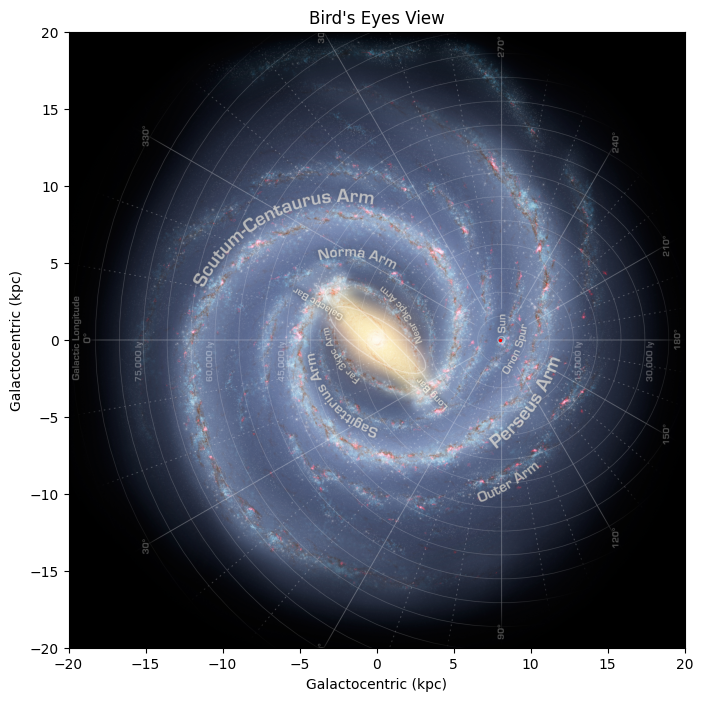

In [3]:
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

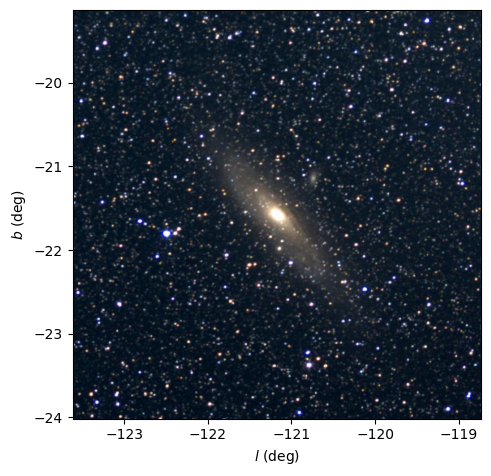

In [4]:
import matplotlib.pyplot as plt

from astropy import units as u

from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))

mw1.transform(ax)

mw1.savefig('galaxy.png')

### Task 2

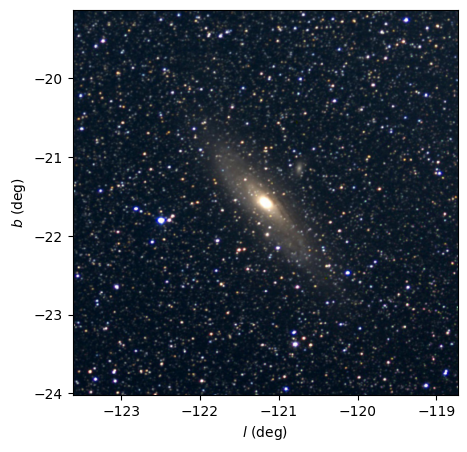

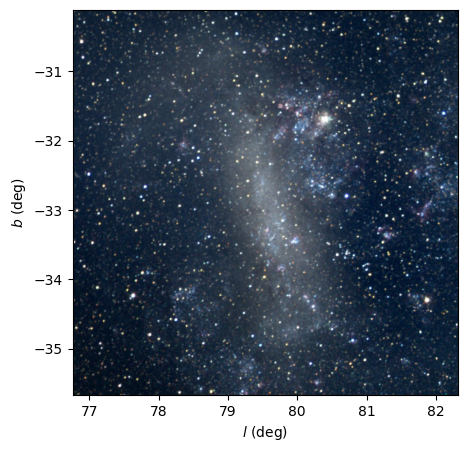

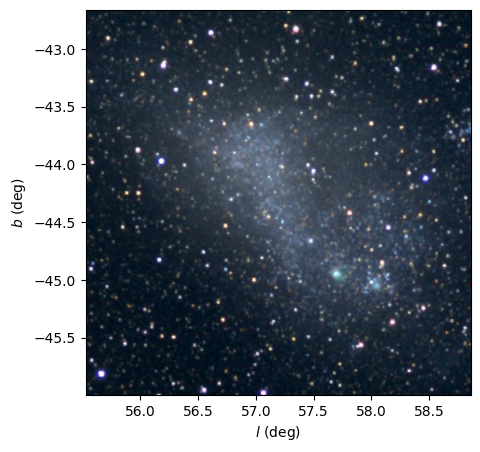

In [ ]:
from PythonFunctions import make_mw_sector

# 1. M31, radius 8800"
fig1, ax1 = make_mw_sector(
    center="M31",
    radius_x_arcsec=8800,
    background="Mellinger color optical survey",
    projection="equirectangular",
    figsize=(5, 5),
    savepath="m31_8800.png",
    show=True,
)

# 2. LMC, different center and radius 10000"
fig2, ax2 = make_mw_sector(
    center="LMC",
    radius_x_arcsec=10000,
    background="Mellinger color optical survey",
    projection="equirectangular",
    figsize=(5, 5),
    savepath="lmc_10000.png",
    show=True,
)

# 3. SMC, different center and radius 6000"
fig3, ax3 = make_mw_sector(
    center="SMC",
    radius_x_arcsec=6000,
    background="Mellinger color optical survey",
    projection="equirectangular",
    figsize=(5, 5),
    savepath="smc_6000.png",
    show=True,
)




### Task 3

In [7]:
from PythonFunctions import plt2rgbarr

img_array = plt2rgbarr(fig)
print(img_array.shape)  


(500, 500, 3)


### Task 4

From task 3 we have gotten an image converted into a red, blue , green(RGB) array, where each pixel is a list of 3 numbers representing R, G and B intensities. Next up is to choose an encoding strategy which can later be used for clustering categories. As the teacher example hinted as, we decided to start with greyscale encoding, where each pixel encodes into greyscale, giving us a single number that shows the brightness intensity of each pixel. 

Brightness intensity is a natural starting point when clustering astronomical images. As different pixel brightness' can be used to cluster into different categories such as:
- Low brightness pixels -> outer rim, dark features of the image
- Medium brightness pixels -> bright stars and dense regions
- Very bright pixels -> The core of the galaxy and the brightest stars


### Task 5

In [ ]:
from PythonFunctions import run_kmeans_on_greyscale

# Running K-means clustering on greyscale pixels
labels, coords, features, grey, kmeans_model = run_kmeans_on_greyscale(
    img_array,
    grey_threshold = 230.0,
    n_clusters = 3,
    random_state = 0,
)

print("Number of bright pixels:", features.shape[0])
print("Feature shape:", features.shape)
print("Cluster centers (brightness):", kmeans_model.cluster_centers_.ravel())

Number of bright pixels: 540
Feature shape: (540, 1)
Labels shape: (540,)
Cluster centers (brightness): [250.37147345 234.11527389 242.43215924]


### Task 5 summary
We select a greyscale threshold value of 230 (on a 0–255 brightness scale) to isolate the brightest pixels in the image. 
Choosing a high threshold to extract bright sources such as stars and galaxy cores is standard practice in both 
general image processing [2,4] and astronomical source detection workflows [3].


### Task 6

We cluster bright pixels using greyscale brightness and overimpose the clusters on the original image.

Greyscale clusters:
Cluster 0: brightness ≈ 250.4, outline color = red
Cluster 1: brightness ≈ 234.1, outline color = lime
Cluster 2: brightness ≈ 242.4, outline color = cyan


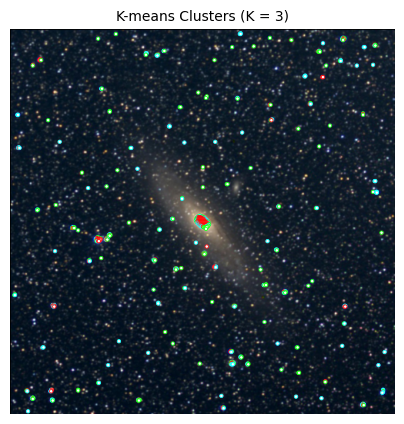

In [ ]:
from PythonFunctions import overimpose_clusters_on_image

fig_clusters, ax_clusters = overimpose_clusters_on_image(
    img_array=img_array,
    coords=coords,
    labels=labels,
    n_clusters=3,
    figsize=(5, 5),
    point_size=6.0,
    alpha=0.9,
)

# Printing clusters, mapping brightness value to color in overimposed image
centers = kmeans_model.cluster_centers_.ravel()

print("Greyscale clusters:")
for cluster_id, brightness in enumerate(centers):
    color = CLUSTER_OUTLINE_COLORS[cluster_id % len(CLUSTER_OUTLINE_COLORS)]
    print(
        f"Cluster {cluster_id}: "
        f"brightness ≈ {brightness:.1f}, "
        f"outline color = {color}"
    )

### Task 6 - Summary on Greyscale encoding

“Note: The outline colors (red, lime, cyan) are not the actual colors present in the image.
They are simply visual markers identifying the cluster groups, kept consistent across greyscale, HSV, and RGB encodings.”

Each cluster is visualized with a fixed color for the greyscale clusters:
- **Cluster 1: brightness ≈ 234.1 → outline color = LIME**
    - This represents the dimmest regions above our greyscale threshold, typically corresponding to faint outskirts, low-density stellar regions, or background structure.
- **Cluster 2: brightness ≈ 242.4 → outline color = CYAN**
    - Corresponds to intermediate brightness, often associated with bright stars and moderately dense stellar fields.
- **Cluster 0: brightness ≈ 250.4 → outline color = RED**
    - Represents the brightest regions in the image like the galaxy core and a couple of other very bright regions.

Greyscale encoding limitations:
- Loses all color information
    - Different stellar populations with different colors can collapse into the same cluster. [1], [6], [7]
- Brightness mixes physical and non-physical effects
    - Dust, aging stars, camera response, and rendering choices all influence brightness. [1], [5]

It is important to highlight that although we map the clusters to **faint outskirts -> bright stars -> Galaxy core**, it is hard to know exactly what those regions actually contain(as discussed by Kelvin et al., 2023[5]) and are for our demonstration purposes simplified into these categories.

### Task 7 - HSV color encoding

There are also other natural encodings to use in astronomical images clustering, two of which we will implement in task 7(these are discussed by Rector (2007) [1]):

HSV Encoding(Hue, Saturation, Value):
With HSV we can convert the image into Hue, Saturation and Value, and represent pixels into a more natural form for humans to understand.
- Hue -> The dominant color
- Saturation -> How "pure" the color is
- Value -> pixel brightness

RGB color encoding:
Instead of converting into a single brightness number, we can keep the RGB values and cluster into categories using color temperature.
- Blueish regions -> young, hot stars
- Yellowish regions -> Older stars
- Reddish regions -> Dust or gas clouds

HSV clusters (Hue, Saturation):
Cluster 0: H ≈ 0.14, S ≈ 0.07, outline color = red
Cluster 1: H ≈ 0.79, S ≈ 0.03, outline color = lime
Cluster 2: H ≈ 0.51, S ≈ 0.04, outline color = cyan


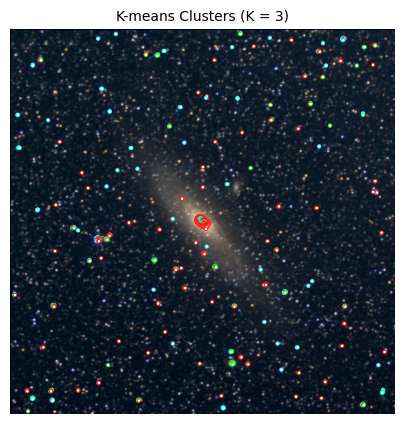

In [29]:
from PythonFunctions import run_kmeans_on_hsv

# Run K-means on HSV (Hue, Saturation) encoding
labels_hsv, coords_hsv, features_hsv, hsv_image, kmeans_hsv = run_kmeans_on_hsv(
    img_array,
    grey_threshold=230.0,
    n_clusters=3,
    random_state=0,
)

centers_hsv = kmeans_hsv.cluster_centers_ 

print("HSV clusters (Hue, Saturation):")
for cluster_id, (h, s) in enumerate(centers_hsv):
    color = CLUSTER_OUTLINE_COLORS[cluster_id % len(CLUSTER_OUTLINE_COLORS)]
    print(
        f"Cluster {cluster_id}: "
        f"H ≈ {h:.2f}, S ≈ {s:.2f}, "
        f"outline color = {color}"
    )

# Overlay these clusters on the original image
fig_hsv_clusters, ax_hsv_clusters = overimpose_clusters_on_image(
    img_array=img_array,
    coords=coords_hsv,
    labels=labels_hsv,
    n_clusters=3,
    figsize=(5, 5),
    point_size=6.0,
    alpha=0.9,
)

### Task 7: HSV encoding summary

For the HSV encoding, each pixel is represented by its Hue (H) and Saturation (S).
K-means (K = 3) produced the following cluster centers:

- **Cluster 0: H ≈ 0.14, S ≈ 0.07 → outline color = RED**  
  - These pixels are characterized by a warm hue and low saturation, often appearing
    as yellowish or washed-out regions in the original RGB image.

- **Cluster 1: H ≈ 0.79, S ≈ 0.03 → outline color = LIME**  
  - Represents faint, low-saturation areas, typically associated with diffuse or
    background regions where little color information is present.

- **Cluster 2: H ≈ 0.51, S ≈ 0.04 → outline color = CYAN**  
  - Corresponds to cooler-toned, slightly bluer regions such as certain star-forming
    or diffuse structures.

HSV Encoding Limitations: 
- Hue unstable for low-saturation pixels
  - Many bright pixels are nearly white → Hue becomes ambiguous. [8]
- HSV is derived from RGB rendering
  - Not from real astrophysical filters. [1], [8]
- Does not correspond directly to physical color temperature
  - True stellar colors must be measured in calibrated bands (e.g., g, r, i filters). [6], [7]

**Note:**  
The outline colors (red, lime, cyan) are **not related to the actual color of the
astronomical region**. They are simply **consistent cluster-label colors** used across
all encoding methods (greyscale, HSV, RGB) to make comparison easier.


### Task 7: RGB color encoding


RGB clusters (mean normalized color):
Cluster 0: R ≈ 0.92, G ≈ 0.93, B ≈ 0.95, outline color = red
Cluster 1: R ≈ 0.97, G ≈ 0.94, B ≈ 0.85, outline color = lime
Cluster 2: R ≈ 0.98, G ≈ 0.98, B ≈ 0.97, outline color = cyan


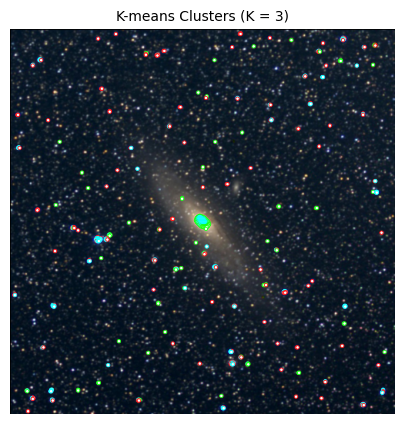

In [34]:
from PythonFunctions import run_kmeans_on_rgb

# Run K-Means on RGB encoding
labels_rgb, coords_rgb, features_rgb, kmeans_rgb = run_kmeans_on_rgb(
    img_array,
    grey_threshold=230.0,
    n_clusters=3,
    random_state=0,
)

# Overlay RGB clusters on the image
fig_rgb_clusters, ax_rgb_clusters = overimpose_clusters_on_image(
    img_array=img_array,
    coords=coords_rgb,
    labels=labels_rgb,
    n_clusters=3,
    figsize=(5, 5),
    point_size=6.0,
    alpha=0.9,
)

centers_rgb = kmeans_rgb.cluster_centers_

print("RGB clusters (mean normalized color):")
for cid, center in enumerate(centers_rgb):
    r, g, b = center
    color = CLUSTER_OUTLINE_COLORS[cid % len(CLUSTER_OUTLINE_COLORS)]
    print(
        f"Cluster {cid}: "
        f"R ≈ {r:.2f}, G ≈ {g:.2f}, B ≈ {b:.2f}, "
        f"outline color = {color}"
    )

### Task 7: RGB color encoding summary

For the RGB encoding, each pixel is represented by its normalized Red, Green, and Blue values.
K-means (K = 3) produced the following cluster centers:

- **Cluster 0: (R,G,B) ≈ (0.92, 0.93, 0.95) → outline color = RED**
    - These RGB values are nearly equal, producing a light grey–white tone.
    - Corresponds to neutral-colored regions, often the washed-out central disk or bright stellar fields where the image is close to saturation.

- **Cluster 1: (R,G,B) ≈ (0.97, 0.94, 0.85) → outline color = LIME**
    - Slightly more red/yellow relative to blue.
    - Likely identifies warmer-toned areas, such as older stellar populations or dust-rich regions, where the galaxy light is subtly reddened.

- **Cluster 2: (R,G,B) ≈ (0.98, 0.98, 0.97) → outline color = CYAN**
    - Very bright, nearly pure white with slight cool bias.
    - Often corresponds to the brightest compact stars and highly luminous core regions, where all color channels are strongly saturated.

RGB Encoding Limitations:
- RGB channels are highly correlated in bright regions
    - Most bright pixels are nearly white → clustering becomes sensitive to tiny variations. [8], [10]
- Brightness and color are entangled
    - The model cannot distinguish “bright because white” from “bright because blue/red”. [1], [9], [10]
- Still based on rendered colors
    - Not true photometric measurements. [1], [10]

### Task 7 discussion and summary

In Task 7 we repeated the K-means clustering (K = 3) using three different encodings of the same M31 sector:
- Greyscale brightness (1D: intensity)
- HSV color (2D: Hue, Saturation)
- RGB color (3D: R, G, B)

All three methods use the same brightness threshold (grey > 230) to focus on bright pixels, and we over-impose the resulting clusters on top of the Task 2 image with fixed outline colors:
- Cluster 0 → red outline
- Cluster 1 → lime outline
- Cluster 2 → cyan outline

The outline colors are purely visual labels and do not represent the physical color of the galaxy regions.

### What Do We Learn from These Unsupervised Models?

Across all three encodings, without any labels and using only image pixels, K-means discovers:
- A bright, compact component (galactic core + brightest stars)
- An intermediate component (spiral arms, bright stellar fields)
- A fainter component (outer / diffuse structures and outskirts)

Greyscale encoding recovers the overall brightness structure.
HSV and RGB encodings add information about color tone and balance, pointing towards potentially different stellar populations or dust effects.

This shows that unsupervised learning can:
- Reveal coherent structures (clusters) in the data
- Help us segment the galaxy image into components that resemble bulge, disk, and outskirts
- Provide a way to compare different feature encodings and see what information they emphasize

But it’s also important to recognize that the clustering algorithm “knows nothing” about astrophysics; it only groups pixels that look similar in the chosen feature space.

 ### Limitations of Our Approach

- Not photometrically calibrated
    - The images we use are 8-bit RGB renderings, not calibrated flux or surface-brightness measurements. Pixel values (0–255) depend on the visualization pipeline, not directly on physical luminosity.

- Threshold choice is arbitrary
    - We only cluster pixels with grey > 230.

- K-means assumptions
    - K-means assumes:
        - clusters are roughly spherical in feature space,
        - clusters are separated primarily by Euclidean distance,
        - K (number of clusters) is fixed by us.
    - Real galaxy structure is much more complex and does not necessarily fit spherical clusters in brightness or color space.

- Image-level, not physics-level
    - Clusters are discovered in the image space, which can be influenced by:
        - noise
        - background subtraction,
        - PSF and scattered light,
        - sky subtraction errors.
    - As discussed in Kelvin et al. (2023) [5], even professional low-surface-brightness studies struggle with these issues, so our interpretations must remain qualitative.

### Conclusion

Unsupervised clustering on different encodings (greyscale, HSV, RGB) gives us three complementary “views” of the same galaxy image:
- Greyscale emphasizes structure in brightness (core vs arms vs outskirts).
- HSV emphasizes structure in color space (warm vs cool, desaturated vs slightly saturated).
- RGB refines the very bright regions by small differences in color balance.

Together, they demonstrate how an unsupervised model can discover meaningful patterns in astronomical images, but also how strongly the results depend on the chosen encoding and on the limitations of the underlying image data.

# References
[1] T. A. Rector & K. Levay, *Image-Processing Techniques for the Creation of Astronomical Images*, 2007.  
Available at: https://w.astro.berkeley.edu/~kalas/disksite/library/rector07a.pdf

[2] OpenCV Documentation – Image Thresholding.  
    https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

[3] Astropy Photutils – Segmentation and Threshold-based Source Detection.  
    https://photutils.readthedocs.io/en/stable/segmentation.html

[4] Scikit-Image – Global Thresholding (Otsu’s Method).  
    https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_thresholding.html

[5] Kelvin, L. S., et al. *Sky subtraction in an era of low surface brightness astronomy*,  
Monthly Notices of the Royal Astronomical Society, 520(2), 2484–2503 (2023).  
Available at: https://academic.oup.com/mnras/article/520/2/2484/6991433

[6] Sloan Digital Sky Survey (SDSS) – Imaging basics and filter system (u, g, r, i, z).  
    Available at: https://www.sdss4.org/dr17/imaging/imaging_basics/

[7] Photometry (astronomy) – overview of measuring flux/brightness with calibrated filters.  
    https://en.wikipedia.org/wiki/Photometry_(astronomy)

[8] HSL and HSV – definitions and properties of hue, saturation, value/lightness color spaces, and their limitations.  
    https://en.wikipedia.org/wiki/HSL_and_HSV

[9] Color Presentation of Astronomical Images – true/false color and mapping intensity data to RGB.  
    https://www.allthesky.com/articles/imagecolor.html

[10] R. Lupton et al., *Preparing Red-Green-Blue Images from CCD Data*, PASP 116, 133 (2004).  
     Abstract: https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract


# Requirements

### AI usage
- In topic 1 AI has been used to find relevant references, refine points and structure discussion parts.

### Individual contributions
- Espen Larsen has worked on Topic 1.
- Amund Romseland Brevik has worked on Topic 2.
- Some cross collaboration and refinements to each others code and text have also been done.

### Self-reflection Espen Larsen
- This project gave me a clearer understanding of how strongly unsupervised learning depends on the choice of features and encodings. I saw firsthand that different representations of the same image (greyscale, HSV, RGB) produce very different clusters, and that these patterns do not automatically correspond to real astrophysical structures. 
- The work also highlighted the limitations of unsupervised methods, which can easily group pixels based on rendering artifacts, brightness scaling, or color-mapping choices rather than physical properties.
- Building reusable functions and a clean workflow helped me experiment more effectively and understand each step in the pipeline. Overall, the project reinforced that in scientific machine learning, results must be interpreted carefully, and domain knowledge is essential to avoid over-interpreting what the clusters seem to show.